#### Power transformations
##### Box–Cox Transformation

A **power transformation** used to make data more **normal (Gaussian)** and to **stabilize variance**.

it can only applied when data contains only positive values

##### Formula

\[
y(\lambda)=
\begin{cases}
\dfrac{y^{\lambda}-1}{\lambda}, & \lambda \neq 0 \\
\ln(y), & \lambda = 0
\end{cases}
\]

##### Key Points

- Works **only for positive values** \((y > 0)\)
- \(\lambda\) controls the transformation:
  - \(\lambda = 1\) → No change  
  - \(\lambda = 0\) → Log transformation  
  - \(\lambda = 0.5\) → Square root  
  - \(\lambda < 0\) → Stronger compression
- Best value of \(\lambda\) is chosen using **maximum likelihood estimation**
- Values from -5 to 5 are examined



##### Yeo–Johnson Transformation (Short & Precise)

A **power transformation** used to make data more **normal (Gaussian)** and **stabilize variance**, similar to Box–Cox.

Unlike Box–Cox, it works with **both positive and negative values**, including zero.

##### Formula

<img src='yeo-johnson.png'></img>
##### Key Points

- Works with **positive, zero, and negative values**
- \(\lambda\) controls the transformation:
  - \(\lambda = 1\) → Approx. no change  
  - \(\lambda = 0\) → Log-like transform (for \(y \ge 0\))  
  - \(\lambda = 2\) → Log-like transform (for \(y < 0\))
- Best value of \(\lambda\) is chosen using **maximum likelihood estimation**
- Commonly used in **machine learning pipelines** when data contains negative values


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score, root_mean_squared_error

In [2]:
df = pd.read_csv('../02 ML pipeline/train.csv')

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\rajar\AppData\Local\Temp\ipykernel_7048\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [6]:
df = df[['Age', 'Fare', 'Survived']]

In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

### Before applying power Transformation accuray of linear regression

In [27]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dt.predict(x_test)
accuracy_score(y_pred, y_test)

0.6753731343283582

##### Applying power transformations to columns

In [40]:
box_cox = PowerTransformer(method='box-cox')
x_train_transformed = box_cox.fit_transform(x_train+0.0001) #The Box-Cox transformation can only be applied to strictly positive data

In [51]:
box_cox.lambdas_

array([0.85396348, 0.22764703])

In [48]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)

Text(0.5, 1.0, 'Plot after power transform')

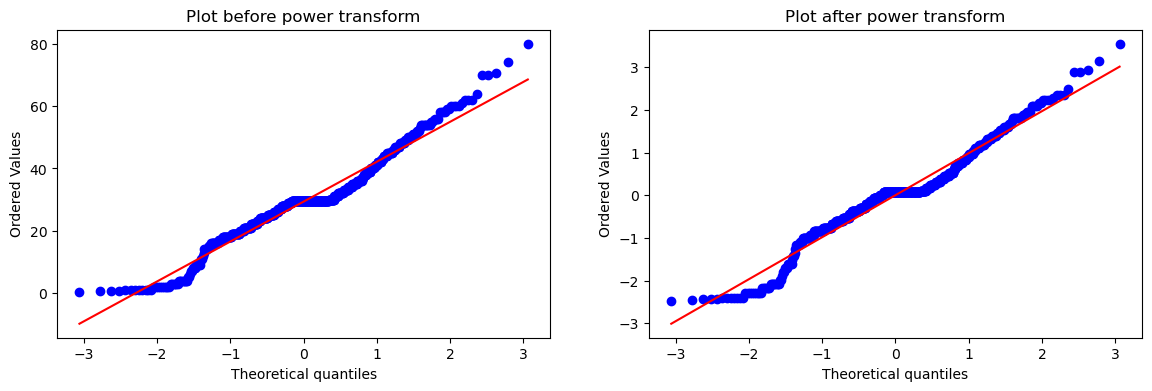

In [50]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist = 'norm', plot = plt)
plt.title('Plot before power transform')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist ='norm', plot = plt)
plt.title('Plot after power transform')

Text(0.5, 1.0, 'Plot after power transform')

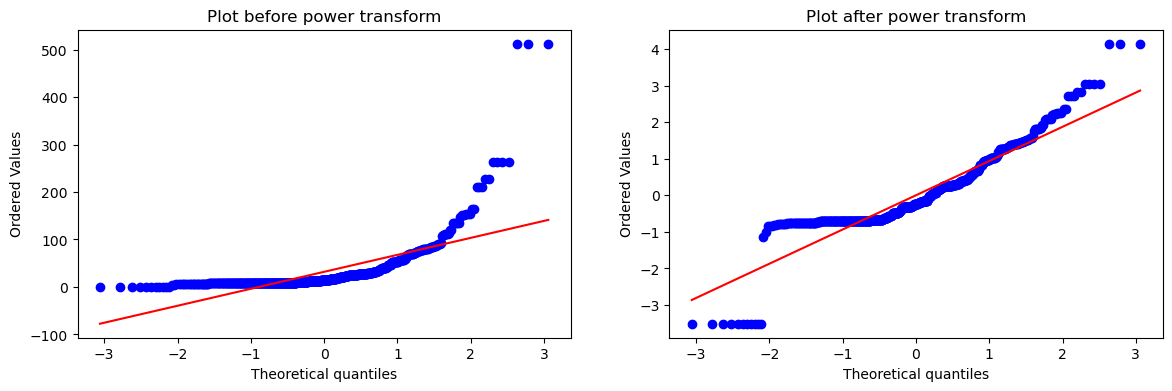

In [52]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist = 'norm', plot = plt)
plt.title('Plot before power transform')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist ='norm', plot = plt)
plt.title('Plot after power transform')

In [61]:
yeo_johnson = PowerTransformer(method='yeo-johnson')
x_train_transformed = yeo_johnson.fit_transform(x_train)

In [56]:
yeo_johnson.lambdas_

array([ 0.85720837, -0.09107111])

In [ ]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)

Text(0.5, 1.0, 'Plot after power transform')

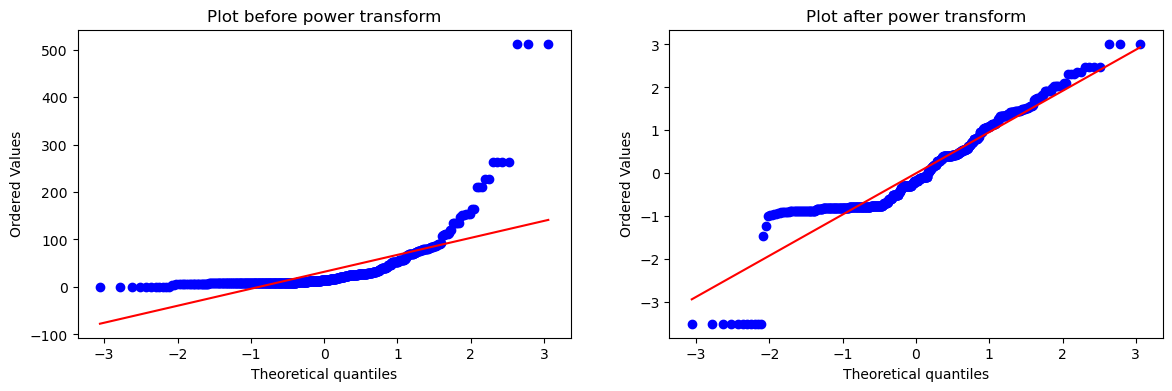

In [63]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist = 'norm', plot = plt)
plt.title('Plot before power transform')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist ='norm', plot = plt)
plt.title('Plot after power transform')

Text(0.5, 1.0, 'Plot after power transform')

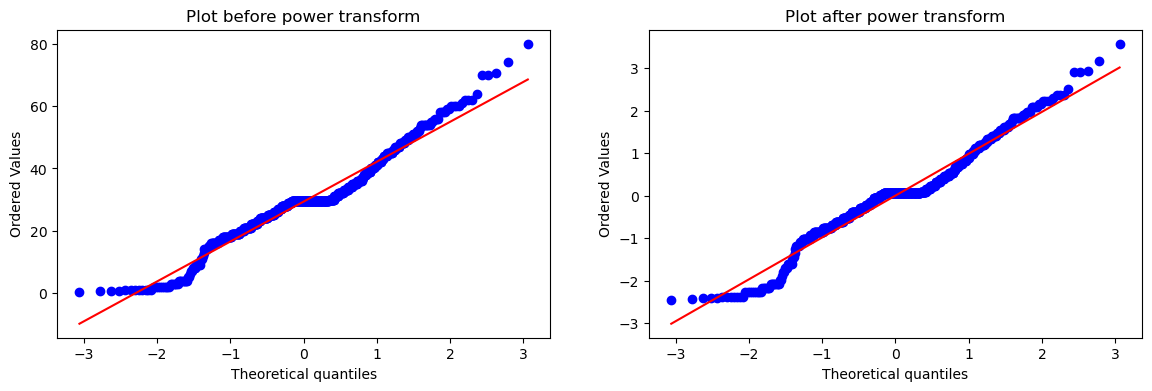

In [64]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist = 'norm', plot = plt)
plt.title('Plot before power transform')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist ='norm', plot = plt)
plt.title('Plot after power transform')